# Segmenting and Clustering Neighborhoods in Paris

## My project description

<div style="margin-top: 20px">

<font size = 2>
In my Capstone project I want to study the different tourist places by neighborhood  of Paris, the city of lights. Study the different small activities around each tourist place such as restaurants, libraries, etc. Also study the correlation between the population by neighborhood and the number of restaurants and their type.
 
</font>
</div>

### Data source

To do this project, I retrieve the data from the opendata site https://opendata.paris.fr/page/home/, by doing web scraping with beautifulsoup, or dowloading the data in a csv file or using the restful API.

In [1]:
!pip install bs4
from bs4 import BeautifulSoup
import requests
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
!pip install lxml
import lxml

     |████████████████████████████████| 112kB 29.8MB/s eta 0:00:01
  Stored in directory: /home/jupyterlab/.cache/pip/wheels/a0/b0/b2/4f80b9456b87abedbc0bf2d52235414c3467d8889be38dd472
Successfully built bs4
     |████████████████████████████████| 5.8MB 6.2MB/s eta 0:00:01


In [2]:
!wget  https://opendata.paris.fr/explore/dataset/quartier_paris/download?format=csv -O paris_quartiers.csv

--2020-02-28 07:39:16--  https://opendata.paris.fr/explore/dataset/quartier_paris/download?format=csv
Resolving opendata.paris.fr (opendata.paris.fr)... 34.249.199.226, 34.248.20.69
Connecting to opendata.paris.fr (opendata.paris.fr)|34.249.199.226|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/csv]
Saving to: ‘paris_quartiers.csv’

paris_quartiers.csv     [   <=>              ] 340.17K   779KB/s    in 0.4s    

2020-02-28 07:39:17 (779 KB/s) - ‘paris_quartiers.csv’ saved [348339]



In [3]:
df_data = pd.read_csv('paris_quartiers.csv',sep=';')
df_data.head()

,n_sq_qu,c_qu,c_quinsee,l_qu,c_ar,n_sq_ar,perimetre,surface,geom_x_y,geom
0,750000021,21,7510601,Monnaie,6,750000006,2391.122818,2.933606e+05,"48.8543844036,2.34003537113","{""type"": ""Polygon"", ""coordinates"": [[[2.343168..."
1,750000022,22,7510602,Odéon,6,750000006,3516.314464,7.161484e+05,"48.8478006293,2.33633882759","{""type"": ""Polygon"", ""coordinates"": [[[2.336988..."
2,750000029,29,7510801,Champs-Elysées,8,750000008,5480.652870,1.140254e+06,"48.8670744922,2.30865168468","{""type"": ""Polygon"", ""coordinates"": [[[2.306463..."
3,750000051,51,7511303,Maison-Blanche,13,750000013,6814.373288,2.231506e+06,"48.8231278057,2.35243314954","{""type"": ""Polygon"", ""coordinates"": [[[2.349115..."
4,750000052,52,7511304,Croulebarbe,13,750000013,3289.230480,6.920677e+05,"48.8337336761,2.34767304607","{""type"": ""Polygon"", ""coordinates"": [[[2.351662..."


## Data analylis and cleaning data for using it

In [4]:

paris_data = df_data.loc[:,['c_ar','geom_x_y','c_quinsee','l_qu']]
paris_data['c_quinsee'] = paris_data['c_quinsee'].astype(str)
paris_data['code'] = paris_data['c_quinsee'].str[0:5].astype(str)
paris_data['Latitude'] = paris_data['geom_x_y'].str.extract('(.*)\,')
paris_data['Longitude'] = paris_data['geom_x_y'].str.extract(',(.*)')
paris_data = paris_data.drop(['geom_x_y','c_quinsee'],axis=1)
paris_data.columns= ['Borough', 'Neighbourhood', 'Code', 'Latitude','Longitude']
#paris_data = paris_data.reset_index()

paris_data['Borough'] = paris_data['Borough'].astype(str)
paris_data['Code'] = paris_data['Code'].astype(str)
paris_data['Latitude'] = paris_data['Latitude'].astype(float)
paris_data['Longitude'] = paris_data['Longitude'].astype(float)

paris_data.head()

,Borough,Neighbourhood,Code,Latitude,Longitude
0,6,Monnaie,75106,48.854384,2.340035
1,6,Odéon,75106,48.847801,2.336339
2,8,Champs-Elysées,75108,48.867074,2.308652
3,13,Maison-Blanche,75113,48.823128,2.352433
4,13,Croulebarbe,75113,48.833734,2.347673


## Load data of paris's borough population

In [5]:
#!conda install lxml --y

from bs4 import BeautifulSoup
import requests

page_url = 'https://fr.vikidia.org/wiki/Arrondissements_de_Paris'

response = requests.get(page_url)

soup = BeautifulSoup(response.text, 'html.parser')


In [100]:
import pandas as pd
import lxml

df_arr = pd.read_html(str(soup.table))[0]
df_arr = df_arr.iloc[1:,1:]
df_arr.columns = ['Borough','Superficie','Population','Density']
df_arr['Borough'] = df_arr.Borough.str.extract('(\d+)')
df_arr = df_arr.reset_index()
df_arr.head()

In [103]:
from decimal import Decimal
#df_arr['Population'] = pd.to_numeric(df_arr['Population'].str.replace('\xa0', ''), errors='coerce')
poplist =  df_arr['Population'].to_list()
poplist = [int(x.replace('\xa0', '')) for x in poplist]
df_arr['Population'] = pd.Series(poplist)

df_arr

,index,Borough,Superficie,Population,Density
0,1,1,183,17100,93
1,2,2,99,22390,227
2,3,3,117,35991,307
3,4,4,160,27769,173
4,5,5,254,60179,236
5,6,6,215,43224,201
6,7,7,409,57092,139
7,8,8,388,38749,99
8,9,9,218,59474,272
9,10,10,289,94474,326


# Displaying Paris's Map

In [7]:
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.5.11
  latest version: 4.8.2

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2019.11.28         |           py36_0         149 KB  conda-forge
    scikit-learn-0.20.1        |   py36h22eb022_0         5.7 MB
    liblapack-3.8.0            |      11_openblas          10 KB  conda-forge
    numpy-1.18.1               |   py36h95a1406_0         5.2 MB  conda-forge
    liblapacke-3.8.0           |      11_openblas          10 KB  conda-forge
    libopenblas-0.3.6          |       h5a2b251_2         7.7 MB
    scipy-1.4.1                |   py36h921218d_0        18.9 MB  conda-forge


In [9]:
# create map of Paris using latitude and longitude values
longitude = 2.3488

latitude = 48.85341
 
map_paris = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers to map
for lat, lng, codepost, neighborhood, borough in zip(paris_data['Latitude'], paris_data['Longitude'], paris_data['Code'], paris_data['Neighbourhood'], paris_data['Borough']):
    label = '{},{}, {} ème'.format(codepost, neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_paris) 

map_paris

# Using Foursquare data to load Paris's venues 

Set credentials

In [10]:
CLIENT_ID = 'AAXS11JUTRNPPC4LYAOQYLTGYUAH13CIHKHXHJEQJY4ERUDM' # your Foursquare ID
CLIENT_SECRET = '0QDSFHVBM3Z1DPVSSWXMCESYJNHNPPJMRT4OJUGZV3IFNDC0' # your Foursquare Secret
VERSION = '20200210' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: AAXS11JUTRNPPC4LYAOQYLTGYUAH13CIHKHXHJEQJY4ERUDM
CLIENT_SECRET:0QDSFHVBM3Z1DPVSSWXMCESYJNHNPPJMRT4OJUGZV3IFNDC0


Infos for the first dataframe's rows

In [11]:
neighborhood_latitude = paris_data.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = paris_data.loc[0, 'Longitude'] # neighborhood longitude value

neighborhood_name = paris_data.loc[0, 'Neighbourhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Monnaie are 48.8543844036, 2.34003537113.


Build Foursquare URL with geo coordinates

In [13]:

# type your answer here
LIMIT = 1000 # limit of number of venues returned by Foursquare API

radius = 500 # define radius

url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)

Load data from Foursquare

In [14]:
results = requests.get(url).json()
#results

Display result keys in json file

In [15]:
results['response']['groups'][0].keys()

dict_keys(['type', 'name', 'items'])

Function that extracts the category of the venue

In [16]:

def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

Normalizing json of venues

In [17]:
from pandas.io.json import json_normalize

venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,Prescription Cocktail Club,Cocktail Bar,48.854921,2.337768
1,Chez Nous,Wine Bar,48.855823,2.340271
2,Maison Sauvage,French Restaurant,48.853744,2.337993
3,Chez Le Libanais,Lebanese Restaurant,48.853285,2.341673
4,Ze Kitchen Galerie,Restaurant,48.855101,2.341297


List of Categories

In [18]:
nearby_venues['categories'].unique()

array(['Cocktail Bar', 'Wine Bar', 'French Restaurant',
       'Lebanese Restaurant', 'Restaurant', 'Breton Restaurant', 'Hotel',
       'Bookstore', 'Ice Cream Shop', 'Hotel Bar', 'Japanese Restaurant',
       'Sandwich Place', 'Italian Restaurant',
       'Modern European Restaurant', 'Seafood Restaurant',
       'Tapas Restaurant', 'Tea Room', 'Chocolate Shop',
       'Ramen Restaurant', 'Coffee Shop', 'Burger Joint', 'Plaza',
       'Museum', 'Creperie', 'Café', 'Liquor Store', 'Beer Bar', 'Bistro',
       'Spanish Restaurant', 'Gourmet Shop', 'Pub', 'Park',
       'Pedestrian Plaza', 'Fountain', 'Electronics Store', 'Sports Bar',
       'Bar', 'Mexican Restaurant', 'Indie Movie Theater',
       'Asian Restaurant', 'Bakery', 'Clothing Store',
       'Cajun / Creole Restaurant', 'Pastry Shop', 'Brasserie',
       'Pizza Place', 'Juice Bar', 'Candy Store', 'Dessert Shop',
       'Cosmetics Shop'], dtype=object)

Number of venues from Foursquare

In [19]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

100 venues were returned by Foursquare.


## Method loading all venues for each neiborhoud

In [20]:

def getNearbyVenues(boroughs, names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for borough, name, lat, lng in zip(boroughs, names, latitudes, longitudes):
        #print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            borough,
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Borough',
                  'Neighbourhood', 
                  'Neighbourhood Latitude', 
                  'Neighbourhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

## Dsiplay data from Foursquare

In [21]:
paris_venues = getNearbyVenues(boroughs=paris_data['Borough'],
                                names=paris_data['Neighbourhood'],
                                   latitudes=paris_data['Latitude'],
                                   longitudes=paris_data['Longitude']
                                  )

paris_venues.head()

,Borough,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,6,Monnaie,48.854384,2.340035,Prescription Cocktail Club,48.854921,2.337768,Cocktail Bar
1,6,Monnaie,48.854384,2.340035,Chez Nous,48.855823,2.340271,Wine Bar
2,6,Monnaie,48.854384,2.340035,Maison Sauvage,48.853744,2.337993,French Restaurant
3,6,Monnaie,48.854384,2.340035,Chez Le Libanais,48.853285,2.341673,Lebanese Restaurant
4,6,Monnaie,48.854384,2.340035,Ze Kitchen Galerie,48.855101,2.341297,Restaurant


Grouping by neighborhood

In [23]:
paris_venues.groupby('Neighbourhood').count()

,Borough,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighbourhood,,,,,,,
Amérique,16,16,16,16,16,16,16
Archives,100,100,100,100,100,100,100
Arsenal,74,74,74,74,74,74,74
Arts-et-Métiers,100,100,100,100,100,100,100
Auteuil,14,14,14,14,14,14,14
Batignolles,100,100,100,100,100,100,100
Bel-Air,5,5,5,5,5,5,5
Belleville,41,41,41,41,41,41,41
Bercy,70,70,70,70,70,70,70


Venue' number by Borough

In [24]:
bor_arr = paris_venues[['Borough','Venue']].groupby('Borough').count()
bor_arr = bor_arr.reset_index()
bor_arr.head()

,Borough,Venue
0,1,388
1,10,332
2,11,316
3,12,164
4,13,146


Join number of venues to population by Borough

In [111]:
df_arr = pd.merge(df_arr, bor_arr, on='Borough')

df_arr = df_arr[['Borough','Population','Venue']]
df_arr.columns = ['Borough','Population','Nb-of-Venues']

df_arr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20 entries, 0 to 19
Data columns (total 3 columns):
Borough         20 non-null object
Population      20 non-null int64
Nb-of-Venues    20 non-null int64
dtypes: int64(2), object(1)
memory usage: 640.0+ bytes


Calcul the correlation between number of venues and population by borough

In [112]:
df_arr.corr()

,Population,Nb-of-Venues
Population,1.000000,-0.879811
Nb-of-Venues,-0.879811,1.000000


In [107]:
#! conda install seaborn --yes
!conda install matplotlib --yes
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.5.11
  latest version: 4.8.2

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs: 
    - matplotlib


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    matplotlib-3.1.3           |           py36_0          21 KB
    scipy-1.4.1                |   py36habc2bb6_0        18.8 MB
    openssl-1.1.1d             |       h7b6447c_4         3.7 MB
    numpy-1.18.1               |   py36h94c655d_0           5 KB
    qt-5.6.3                   |       h8bf5577_3        45.7 MB
    certifi-2019.11.28         |           py36_0         156 KB
    sip-4.18.1                 |   py36hf484d3e_2         278 KB
    matplotlib-base-3.1.3      |   py36hef1b27d_0         6.6 MB
  

In [114]:
df_arr.head()

,Borough,Population,Nb-of-Venues
0,1,17100,388
1,2,22390,400
2,3,35991,400
3,4,27769,371
4,5,60179,313


(0, 451.6807824606434)

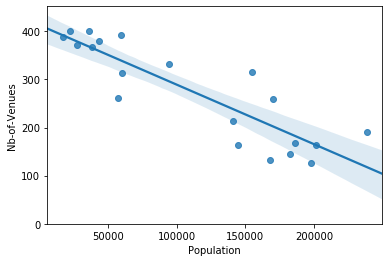

In [115]:
df_arr[['Nb-of-Venues','Population']].corr()
# Engine size as potential predictor variable of price
sns.regplot(x="Population", y="Nb-of-Venues", data=df_arr)
plt.ylim(0,)

## One Hot encoding by "Venue Category"

In [116]:
# one hot encoding
paris_onehot = pd.get_dummies(paris_venues[['Venue Category']], prefix="", prefix_sep="")
# add neighborhood column back to dataframe
paris_onehot['Neighbourhood'] = paris_venues['Neighbourhood'] 


# move neighborhood column to the first column
fixed_columns = [paris_onehot.columns[-1]] + list(paris_onehot.columns[:-1])
paris_onehot = paris_onehot[fixed_columns]

paris_onehot.head()

,Neighbourhood,Accessories Store,Afghan Restaurant,African Restaurant,Alsatian Restaurant,American Restaurant,Antique Shop,Arcade,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Auvergne Restaurant,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Basketball Court,Basque Restaurant,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Belgian Restaurant,Big Box Store,Bike Rental / Bike Share,Bistro,Boat or Ferry,Bookstore,Botanical Garden,Boutique,Boxing Gym,Brasserie,Brazilian Restaurant,Breakfast Spot,Breton Restaurant,Brewery,Bridge,Bubble Tea Shop,Building,Burger Joint,Burgundian Restaurant,Bus Station,Bus Stop,Butcher,Café,Cajun / Creole Restaurant,Cambodian Restaurant,Camera Store,Canal,Canal Lock,Candy Store,Cantonese Restaurant,Cemetery,Ch'ti Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Circus,Clothing Store,Cocktail Bar,Coffee Shop,Colombian Restaurant,Comedy Club,Comfort Food Restaurant,Comic Shop,Concert Hall,Convenience Store,Corsican Restaurant,Cosmetics Shop,Costume Shop,Coworking Space,Creperie,Cultural Center,Cupcake Shop,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Diner,Discount Store,Dive Bar,Doner Restaurant,Donut Shop,Eastern European Restaurant,Electronics Store,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Exhibit,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Fondue Restaurant,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Gas Station,Gastropub,Gay Bar,General College & University,General Entertainment,Gift Shop,Gluten-free Restaurant,Gourmet Shop,Government Building,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Halal Restaurant,Harbor / Marina,Hawaiian Restaurant,Health Food Store,Herbs & Spices Store,Historic Site,History Museum,Hobby Shop,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indonesian Restaurant,Insurance Office,Israeli Restaurant,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Jiangxi Restaurant,Juice Bar,Karaoke Bar,Kebab Restaurant,Kids Store,Kitchen Supply Store,Korean Restaurant,Kurdish Restaurant,Lake,Latin American Restaurant,Leather Goods Store,Lebanese Restaurant,Lingerie Store,Liquor Store,Locksmith,Lounge,Lyonese Bouchon,Mac & Cheese Joint,Market,Martial Arts Dojo,Mediterranean Restaurant,Memorial Site,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Movie Theater,Multiplex,Museum,Music Store,Music Venue,New American Restaurant,Newsstand,Nightclub,Noodle House,Office,Okonomiyaki Restaurant,Opera House,Optical Shop,Organic Grocery,Other Nightlife,Outdoor Sculpture,Outdoors & Recreation,Paper / Office Supplies Store,Park,Pastry Shop,Pedestrian Plaza,Performing Arts Venue,Perfume Shop,Peruvian Restaurant,Pet Café,Pet Store,Pharmacy,Pier,Pizza Place,Planetarium,Platform,Playground,Plaza,Poke Place,Pool,Portuguese Restaurant,Provençal Restaurant,Pub,Racecourse,Ramen Restaurant,Record Shop,Recreation Center,Resort,Restaurant,Rock Club,Romanian Restaurant,Roof Deck,Russian Restaurant,Salad Place,Salon / Barbershop,Sandwich Place,Savoyard Restaurant,Scandinavian Restaurant,Scenic Lookout,Science Museum,Sculpture Garden,Seafood Restaurant,Shanxi Restaurant,Shoe Store,Shopping Mall,Shopping Plaza,Smoke Shop,Snack Place,Soba Restaurant,Soccer Field,Soccer Stadium,Soup Place,South American Restaurant,Southern / Soul Food Restaurant,Southwestern French Restaurant,Souvenir Shop,Souvlaki Shop,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Sports Club,Stadium,Steakhouse,Supermarket,Sushi Restaurant,Sy

In [117]:
paris_onehot.shape

(5483, 303)

In [118]:
paris_grouped = paris_onehot.groupby('Neighbourhood').mean().reset_index()
paris_grouped.head()

,Neighbourhood,Accessories Store,Afghan Restaurant,African Restaurant,Alsatian Restaurant,American Restaurant,Antique Shop,Arcade,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Auvergne Restaurant,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Basketball Court,Basque Restaurant,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Belgian Restaurant,Big Box Store,Bike Rental / Bike Share,Bistro,Boat or Ferry,Bookstore,Botanical Garden,Boutique,Boxing Gym,Brasserie,Brazilian Restaurant,Breakfast Spot,Breton Restaurant,Brewery,Bridge,Bubble Tea Shop,Building,Burger Joint,Burgundian Restaurant,Bus Station,Bus Stop,Butcher,Café,Cajun / Creole Restaurant,Cambodian Restaurant,Camera Store,Canal,Canal Lock,Candy Store,Cantonese Restaurant,Cemetery,Ch'ti Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Circus,Clothing Store,Cocktail Bar,Coffee Shop,Colombian Restaurant,Comedy Club,Comfort Food Restaurant,Comic Shop,Concert Hall,Convenience Store,Corsican Restaurant,Cosmetics Shop,Costume Shop,Coworking Space,Creperie,Cultural Center,Cupcake Shop,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Diner,Discount Store,Dive Bar,Doner Restaurant,Donut Shop,Eastern European Restaurant,Electronics Store,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Exhibit,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Fondue Restaurant,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Gas Station,Gastropub,Gay Bar,General College & University,General Entertainment,Gift Shop,Gluten-free Restaurant,Gourmet Shop,Government Building,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Halal Restaurant,Harbor / Marina,Hawaiian Restaurant,Health Food Store,Herbs & Spices Store,Historic Site,History Museum,Hobby Shop,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indonesian Restaurant,Insurance Office,Israeli Restaurant,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Jiangxi Restaurant,Juice Bar,Karaoke Bar,Kebab Restaurant,Kids Store,Kitchen Supply Store,Korean Restaurant,Kurdish Restaurant,Lake,Latin American Restaurant,Leather Goods Store,Lebanese Restaurant,Lingerie Store,Liquor Store,Locksmith,Lounge,Lyonese Bouchon,Mac & Cheese Joint,Market,Martial Arts Dojo,Mediterranean Restaurant,Memorial Site,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Movie Theater,Multiplex,Museum,Music Store,Music Venue,New American Restaurant,Newsstand,Nightclub,Noodle House,Office,Okonomiyaki Restaurant,Opera House,Optical Shop,Organic Grocery,Other Nightlife,Outdoor Sculpture,Outdoors & Recreation,Paper / Office Supplies Store,Park,Pastry Shop,Pedestrian Plaza,Performing Arts Venue,Perfume Shop,Peruvian Restaurant,Pet Café,Pet Store,Pharmacy,Pier,Pizza Place,Planetarium,Platform,Playground,Plaza,Poke Place,Pool,Portuguese Restaurant,Provençal Restaurant,Pub,Racecourse,Ramen Restaurant,Record Shop,Recreation Center,Resort,Restaurant,Rock Club,Romanian Restaurant,Roof Deck,Russian Restaurant,Salad Place,Salon / Barbershop,Sandwich Place,Savoyard Restaurant,Scandinavian Restaurant,Scenic Lookout,Science Museum,Sculpture Garden,Seafood Restaurant,Shanxi Restaurant,Shoe Store,Shopping Mall,Shopping Plaza,Smoke Shop,Snack Place,Soba Restaurant,Soccer Field,Soccer Stadium,Soup Place,South American Restaurant,Southern / Soul Food Restaurant,Southwestern French Restaurant,Souvenir Shop,Souvlaki Shop,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Sports Club,Stadium,Steakhouse,Supermarket,Sushi Restaurant,Sy

In [119]:
paris_grouped.shape

(80, 303)

Let's print each neighborhood along with the top 5 most common venues

In [120]:
num_top_venues = 5

for hood in paris_grouped['Neighbourhood']:
    print('----------',hood,'----------')
    temp = paris_grouped[paris_grouped['Neighbourhood'] == hood].T.reset_index()
    temp.columns=['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq':2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

---------- Amérique ----------
               venue  freq
0        Supermarket  0.12
1               Pool  0.12
2  French Restaurant  0.12
3      Grocery Store  0.06
4   Asian Restaurant  0.06


---------- Archives ----------
               venue  freq
0     Clothing Store  0.08
1  French Restaurant  0.07
2        Coffee Shop  0.05
3          Bookstore  0.04
4       Burger Joint  0.04


---------- Arsenal ----------
                venue  freq
0   French Restaurant  0.14
1               Hotel  0.11
2  Italian Restaurant  0.05
3                Park  0.04
4           Gastropub  0.04


---------- Arts-et-Métiers ----------
                venue  freq
0   French Restaurant  0.09
1               Hotel  0.07
2  Italian Restaurant  0.05
3        Cocktail Bar  0.05
4         Coffee Shop  0.04


---------- Auteuil ----------
                   venue  freq
0           Tennis Court  0.36
1                Stadium  0.07
2  Outdoors & Recreation  0.07
3                 Office  0.07
4      French Res

### Let's put that into a pandas dataframe

Function to sort the venues in descending order

In [121]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Let's create the new dataframe and display the top 10 venues for each neighborhood.

In [122]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighbourhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighbourhood'] = paris_grouped['Neighbourhood']

for ind in np.arange(paris_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(paris_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Amérique,French Restaurant,Pool,Supermarket,Grocery Store,Park,Plaza,Bank,Bakery,Bus Stop,Café
1,Archives,Clothing Store,French Restaurant,Coffee Shop,Japanese Restaurant,Art Gallery,Burger Joint,Pastry Shop,Bookstore,Café,Bistro
2,Arsenal,French Restaurant,Hotel,Italian Restaurant,Park,Plaza,Gastropub,Pedestrian Plaza,Vegetarian / Vegan Restaurant,Boat or Ferry,Pub
3,Arts-et-Métiers,French Restaurant,Hotel,Cocktail Bar,Italian Restaurant,Coffee Shop,Restaurant,Chinese Restaurant,Moroccan Restaurant,Japanese Restaurant,Vietnamese Restaurant
4,Auteuil,Tennis Court,Racecourse,Outdoors & Recreation,Office,Museum,Sporting Goods Shop,Stadium,Botanical Garden,Garden,French Restaurant


# Cluster Neighborhoods¶

Run k-means to cluster the neighborhood into 5 clusters.

In [123]:
# import k-means from clustering stage
from sklearn.cluster import KMeans

# set number of clusters
kclusters = 5

paris_grouped_clustering = paris_grouped.drop('Neighbourhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(paris_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([0, 0, 4, 0, 2, 4, 0, 0, 0, 0], dtype=int32)

In [124]:
kmeans.labels_

array([0, 0, 4, 0, 2, 4, 0, 0, 0, 0, 1, 1, 0, 1, 0, 4, 4, 1, 0, 0, 4, 4,
       1, 0, 1, 0, 0, 4, 1, 4, 4, 0, 4, 0, 4, 0, 1, 0, 0, 4, 4, 4, 1, 0,
       4, 0, 0, 0, 1, 3, 1, 1, 1, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 1, 4, 1,
       0, 4, 0, 4, 4, 4, 0, 4, 4, 0, 4, 4, 0, 0], dtype=int32)

Let's create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.

In [125]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

paris_merged = paris_data

# merge paris_grouped with paris_data to add latitude/longitude for each neighborhood
paris_merged = paris_merged.join(neighborhoods_venues_sorted.set_index('Neighbourhood'), on='Neighbourhood')

paris_merged.head() # check the last columns!

,Borough,Neighbourhood,Code,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,6,Monnaie,75106,48.854384,2.340035,4,French Restaurant,Hotel,Plaza,Wine Bar,Café,Cocktail Bar,Bistro,Ice Cream Shop,Seafood Restaurant,Italian Restaurant
1,6,Odéon,75106,48.847801,2.336339,0,Hotel,French Restaurant,Bistro,Café,Plaza,Bakery,Italian Restaurant,Pizza Place,Fountain,Pastry Shop
2,8,Champs-Elysées,75108,48.867074,2.308652,1,French Restaurant,Hotel,Boutique,Clothing Store,Art Gallery,Garden,Italian Restaurant,Japanese Restaurant,Women's Store,Plaza
3,13,Maison-Blanche,75113,48.823128,2.352433,0,French Restaurant,Bakery,Café,Bistro,Plaza,Tram Station,Fast Food Restaurant,Hotel,Park,Diner
4,13,Croulebarbe,75113,48.833734,2.347673,4,French Restaurant,Bar,Sushi Restaurant,Hotel,Italian Restaurant,Café,Sandwich Place,Bakery,Dessert Shop,Brasserie


## Let's visualize the resulting clusters¶

In [127]:
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# create map
paris_map_clusters = folium.Map(location=[latitude, longitude], zoom_start=10)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, hood, cluster, code in zip(paris_merged['Latitude'], paris_merged['Longitude'], paris_merged['Neighbourhood'], paris_merged['Cluster Labels'], paris_merged['Code']):
    label = folium.Popup(str(code) + ', ' + str(hood) + ', Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster)-1],
        fill=True,
        fill_color=rainbow[int(cluster)-1],
        fill_opacity=0.7).add_to(paris_map_clusters)
       
paris_map_clusters

### Cluster 0 venues

In [57]:
paris_merged.loc[paris_merged['Cluster Labels'] == 0, paris_merged.columns[[1] + list(range(5, paris_merged.shape[1]))]]

,Neighbourhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Monnaie,0,French Restaurant,Hotel,Plaza,Café,Wine Bar,Ice Cream Shop,Seafood Restaurant,Cocktail Bar,Bistro,Italian Restaurant
1,Odéon,0,French Restaurant,Hotel,Bistro,Café,Plaza,Bakery,Ice Cream Shop,Italian Restaurant,Fountain,Tea Room
2,Champs-Elysées,0,French Restaurant,Hotel,Boutique,Italian Restaurant,Garden,Art Gallery,Clothing Store,Steakhouse,Women's Store,Japanese Restaurant
5,Notre-Dame-des-Champs,0,French Restaurant,Hotel,Bakery,Japanese Restaurant,Italian Restaurant,Bistro,Creperie,Café,Steakhouse,Tea Room
6,Petit-Montrouge,0,Hotel,French Restaurant,Supermarket,Italian Restaurant,Sushi Restaurant,Bakery,Café,Plaza,Food & Drink Shop,Discount Store
9,Chaillot,0,Hotel,French Restaurant,Italian Restaurant,Bakery,Plaza,Café,Art Museum,Japanese Restaurant,Chinese Restaurant,Indian Restaurant
10,Epinettes,0,Hotel,French Restaurant,Restaurant,Supermarket,Bakery,Turkish Restaurant,Bistro,Garden,Pedestrian Plaza,Sushi Restaurant
11,Sorbonne,0,Hotel,French Restaurant,Indie Movie Theater,Plaza,Bakery,Bookstore,Pastry Shop,Wine Bar,Coffee Shop,Mexican Restaurant
12,Saint-Georges,0,Hotel,French Restaurant,Cocktail Bar,Italian Restaurant,Bar,Bakery,Plaza,Comedy Club,Theater,Coffee Shop
13,Chaussée-d'Antin,0,French Restaurant,Hotel,Coffee Shop,Sandwich Place,Clothing Store,Department Store,Women's Store,Italian Restaurant,Bistro,Dessert Shop


### Cluster 1 venues

In [128]:
paris_merged.loc[paris_merged['Cluster Labels'] == 1, paris_merged.columns[[1] + list(range(5, paris_merged.shape[1]))]]

,Neighbourhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,Champs-Elysées,1,French Restaurant,Hotel,Boutique,Clothing Store,Art Gallery,Garden,Italian Restaurant,Japanese Restaurant,Women's Store,Plaza
6,Petit-Montrouge,1,Hotel,French Restaurant,Supermarket,Italian Restaurant,Sushi Restaurant,Bakery,Pizza Place,Bistro,Plaza,Discount Store
9,Chaillot,1,Hotel,French Restaurant,Italian Restaurant,Bakery,Café,Plaza,Art Museum,Japanese Restaurant,Chinese Restaurant,Pub
12,Saint-Georges,1,Hotel,French Restaurant,Cocktail Bar,Italian Restaurant,Bar,Comedy Club,Coffee Shop,Theater,Bakery,Plaza
13,Chaussée-d'Antin,1,Hotel,French Restaurant,Coffee Shop,Clothing Store,Department Store,Women's Store,Italian Restaurant,Sandwich Place,Boutique,Bistro
20,Gaillon,1,Hotel,Japanese Restaurant,French Restaurant,Italian Restaurant,Korean Restaurant,Coffee Shop,Plaza,Bakery,Theater,Pastry Shop
27,Plaisance,1,Hotel,French Restaurant,Bistro,Bar,Japanese Restaurant,Grocery Store,Korean Restaurant,Modern European Restaurant,Music Venue,Café
29,Madeleine,1,Hotel,French Restaurant,Boutique,Women's Store,Gourmet Shop,Clothing Store,Dessert Shop,Theater,Asian Restaurant,Men's Store
39,Ecole-Militaire,1,Hotel,French Restaurant,Plaza,Diner,Historic Site,Farmers Market,Pastry Shop,Garden,Café,Dessert Shop
40,Grenelle,1,Hotel,Japanese Restaurant,Bistro,French Restaurant,Bakery,Coffee Shop,Gym / Fitness Center,Italian Restaurant,Indian Restaurant,Mobile Phone Shop


### Cluster 2 venues

In [129]:
paris_merged.loc[paris_merged['Cluster Labels'] == 3, paris_merged.columns[[1] + list(range(5, paris_merged.shape[1]))]]

,Neighbourhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
26,Picpus,3,Locksmith,Pastry Shop,Hotel,Fish & Chips Shop,English Restaurant,Ethiopian Restaurant,Exhibit,Falafel Restaurant,Farmers Market,Fast Food Restaurant
